# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/01_matrix_multiplication`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/01_matrix_multiplication/03_applications.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# 3. Matrix Multiplication Applications

Matrix multiplication has numerous applications in fields like machine learning, computer graphics, and data science. Let's explore some practical examples.


## 3.1 Setup

First, let's import our dependencies and define helper functions:


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from typing import Tuple, List

# Create a nicer colormap for visualizing matrices
colors = [(0.8, 0.8, 1), (0.1, 0.3, 0.8)]  # Light blue to darker blue
cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=100)

# Helper function to visualize a single matrix
def visualize_matrix(matrix: torch.Tensor, title: str = "") -> None:
    """Visualize a matrix as a heatmap."""
    # Convert to numpy for matplotlib
    matrix_np = matrix.detach().cpu().numpy()
    
    plt.figure(figsize=(7, 7))
    plt.imshow(matrix_np, cmap=cmap)
    plt.colorbar(shrink=0.8)
    
    # Add grid lines
    plt.grid(which='minor', color='w', linestyle='-', linewidth=0.5)
    
    # Add text annotations for smaller matrices
    if matrix_np.shape[0] <= 5 and matrix_np.shape[1] <= 5:
        for i in range(matrix_np.shape[0]):
            for j in range(matrix_np.shape[1]):
                plt.text(j, i, f"{matrix_np[i, j]:.1f}", 
                        ha="center", va="center", 
                        color="black" if matrix_np[i, j] < 0.7 else "white")
    
    # Add dimension annotations
    plt.title(f"{title}\nShape: {matrix_np.shape}")
    plt.xlabel(f"Columns (n={matrix_np.shape[1]})")
    plt.ylabel(f"Rows (m={matrix_np.shape[0]})")
    plt.tight_layout()
    plt.show()

# Function to visualize matrix multiplication
def visualize_matrix_multiplication(A: torch.Tensor, B: torch.Tensor, title: str = "") -> torch.Tensor:
    """Visualize matrix multiplication A @ B with dimensions."""
    # Check compatibility
    if A.shape[1] != B.shape[0]:
        raise ValueError(f"Incompatible dimensions: A is {A.shape}, B is {B.shape}")
    
    # Perform the multiplication
    C = A @ B
    
    # Create figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    
    # Plot matrices
    matrices = [A, B, C]
    titles = [
        f"Matrix A\n{A.shape[0]}×{A.shape[1]}", 
        f"Matrix B\n{B.shape[0]}×{B.shape[1]}",
        f"Result C = A @ B\n{C.shape[0]}×{C.shape[1]}"
    ]
    
    for i, (matrix, title) in enumerate(zip(matrices, titles)):
        matrix_np = matrix.detach().cpu().numpy()
        im = axs[i].imshow(matrix_np, cmap=cmap)
        axs[i].set_title(title)
        
        # Add text annotations (for smaller matrices)
        if matrix_np.shape[0] <= 5 and matrix_np.shape[1] <= 5:
            for r in range(matrix_np.shape[0]):
                for c in range(matrix_np.shape[1]):
                    axs[i].text(c, r, f"{matrix_np[r, c]:.1f}", 
                            ha="center", va="center", 
                            color="black" if matrix_np[r, c] < 0.7 else "white")
    
    # Add a shared colorbar
    fig.colorbar(im, ax=axs, shrink=0.6)
    
    # Add the operation text between plots
    plt.figtext(0.31, 0.5, "@", fontsize=24)
    plt.figtext(0.64, 0.5, "=", fontsize=24)
    
    # Add dimension explanation
    m, n = A.shape
    n_check, p = B.shape
    plt.suptitle(f"{title}\n({m}×{n}) @ ({n_check}×{p}) → ({m}×{p})", fontsize=14)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()
    
    return C


## 3.2 Linear Transformations in 2D Space

Matrix multiplication can be used to transform 2D points. Let's see how we can use a 2×2 matrix to perform:
1. Scaling
2. Rotation
3. Shearing


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


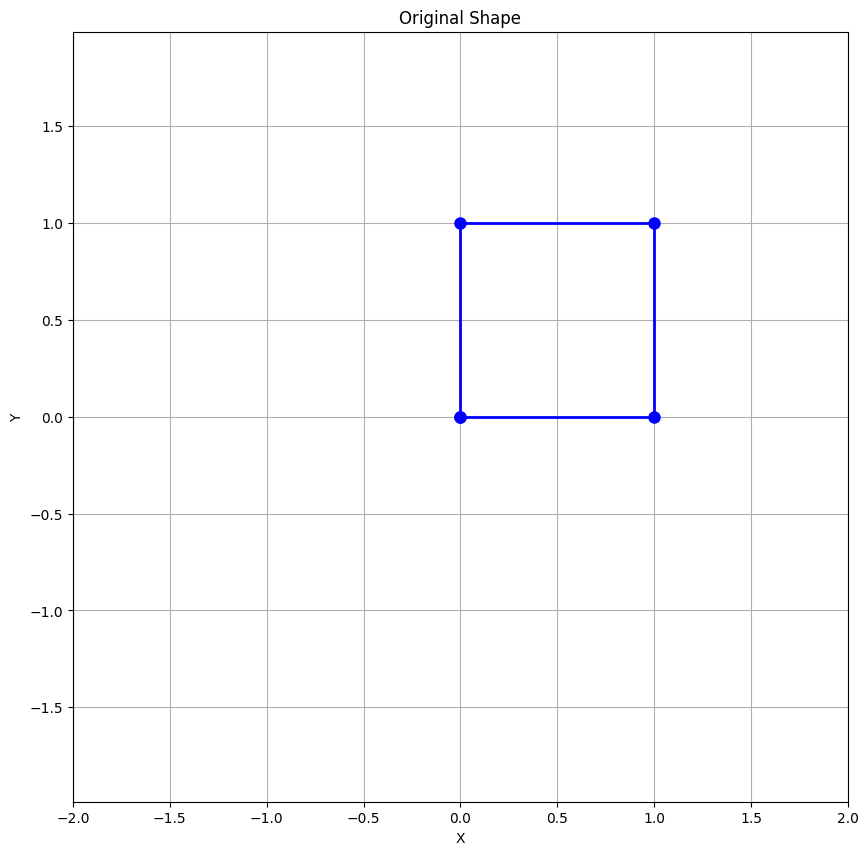

In [2]:
# First, let's create a set of 2D points forming a square
points = torch.tensor([
    [0, 0],  # bottom-left
    [1, 0],  # bottom-right
    [1, 1],  # top-right
    [0, 1],  # top-left
    [0, 0]   # bottom-left again to close the shape
], dtype=torch.float32)

# Let's plot our original shape
plt.figure(figsize=(10, 10))
plt.plot(points[:, 0], points[:, 1], 'b-o', linewidth=2, markersize=8)
plt.grid(True)
plt.axis('equal')
plt.title('Original Shape')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()


### 3.2.1 Scaling Transformation

A scaling matrix multiplies each coordinate by a scaling factor:


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


Scaling Matrix:
tensor([[1.5000, 0.0000],
        [0.0000, 0.5000]])


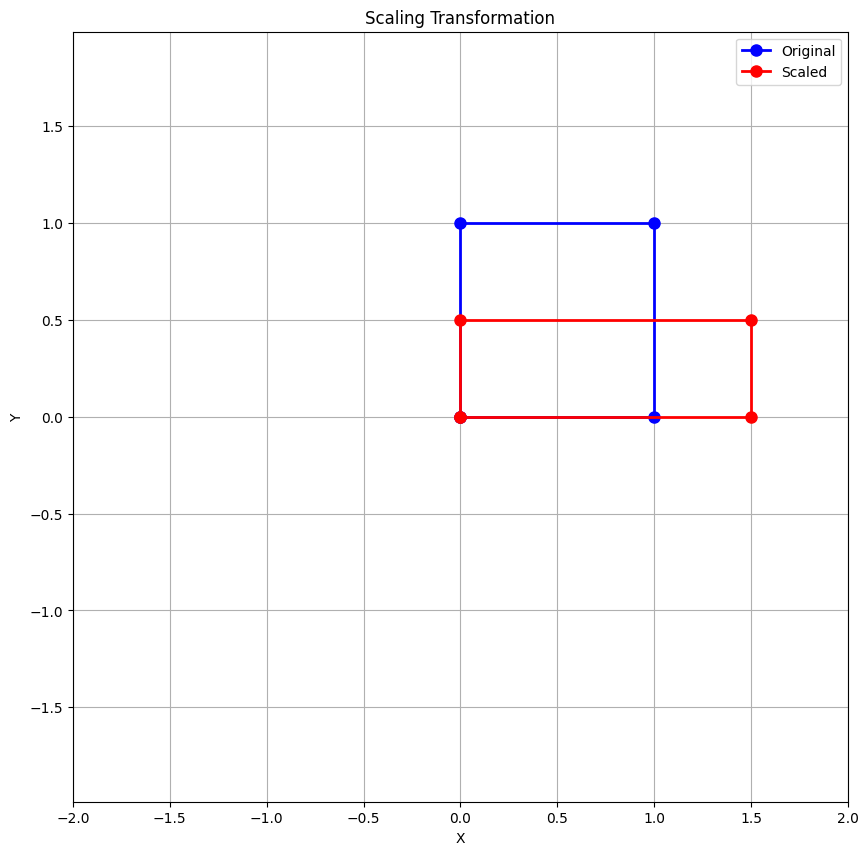

In [3]:
# Scaling matrix: scale x by 1.5 and y by 0.5
scaling_matrix = torch.tensor([
    [1.5, 0.0],  # x scaling
    [0.0, 0.5]   # y scaling
])

print("Scaling Matrix:")
print(scaling_matrix)

# Apply the transformation to our points
# We need to transpose points for matrix multiplication
transformed_points = points @ scaling_matrix

# Plot the original and transformed shapes
plt.figure(figsize=(10, 10))
plt.plot(points[:, 0], points[:, 1], 'b-o', linewidth=2, markersize=8, label='Original')
plt.plot(transformed_points[:, 0], transformed_points[:, 1], 'r-o', linewidth=2, markersize=8, label='Scaled')
plt.grid(True)
plt.axis('equal')
plt.title('Scaling Transformation')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.show()


### 3.2.2 Rotation Transformation

A rotation matrix rotates points by a given angle:


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


Rotation Matrix (45 degrees):
tensor([[ 0.7071, -0.7071],
        [ 0.7071,  0.7071]])


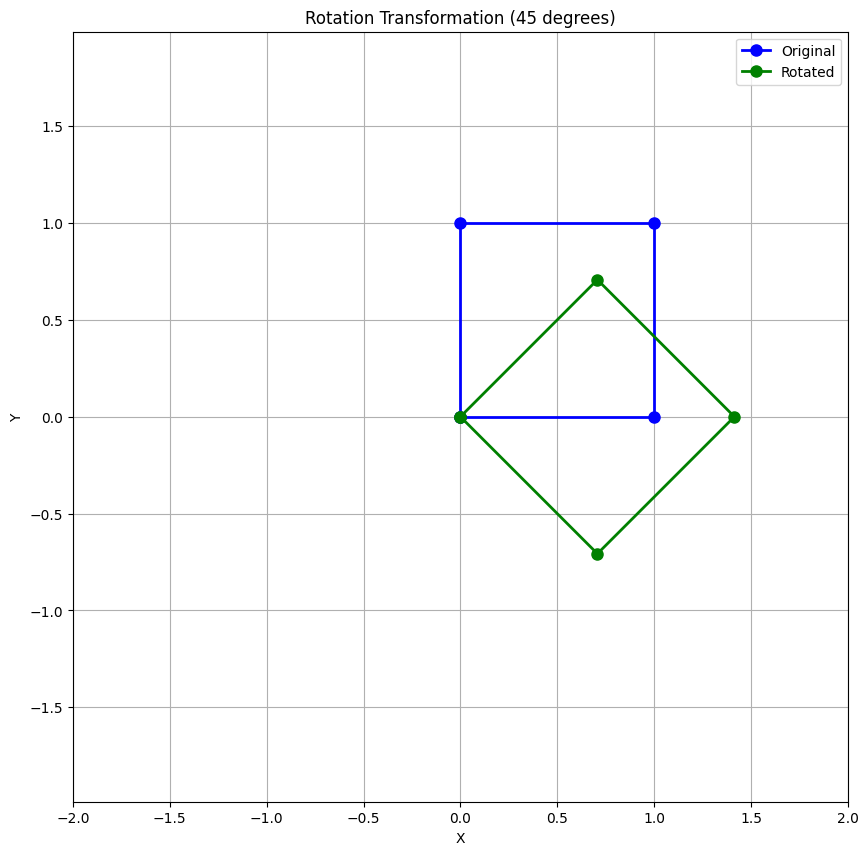

In [4]:
# Rotation matrix: rotate by 45 degrees (π/4 radians)
angle = torch.tensor(45.0 * torch.pi / 180.0)  # Convert degrees to radians
rotation_matrix = torch.tensor([
    [torch.cos(angle), -torch.sin(angle)],
    [torch.sin(angle), torch.cos(angle)]
])

print("Rotation Matrix (45 degrees):")
print(rotation_matrix)

# Apply the transformation
transformed_points = points @ rotation_matrix

# Plot the original and transformed shapes
plt.figure(figsize=(10, 10))
plt.plot(points[:, 0], points[:, 1], 'b-o', linewidth=2, markersize=8, label='Original')
plt.plot(transformed_points[:, 0], transformed_points[:, 1], 'g-o', linewidth=2, markersize=8, label='Rotated')
plt.grid(True)
plt.axis('equal')
plt.title('Rotation Transformation (45 degrees)')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.show()


### 3.2.3 Combined Transformations

We can combine transformations by multiplying the matrices together. The order matters!


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


Combined Matrix (Scale then Rotate):
tensor([[ 1.0607, -1.0607],
        [ 0.3536,  0.3536]])


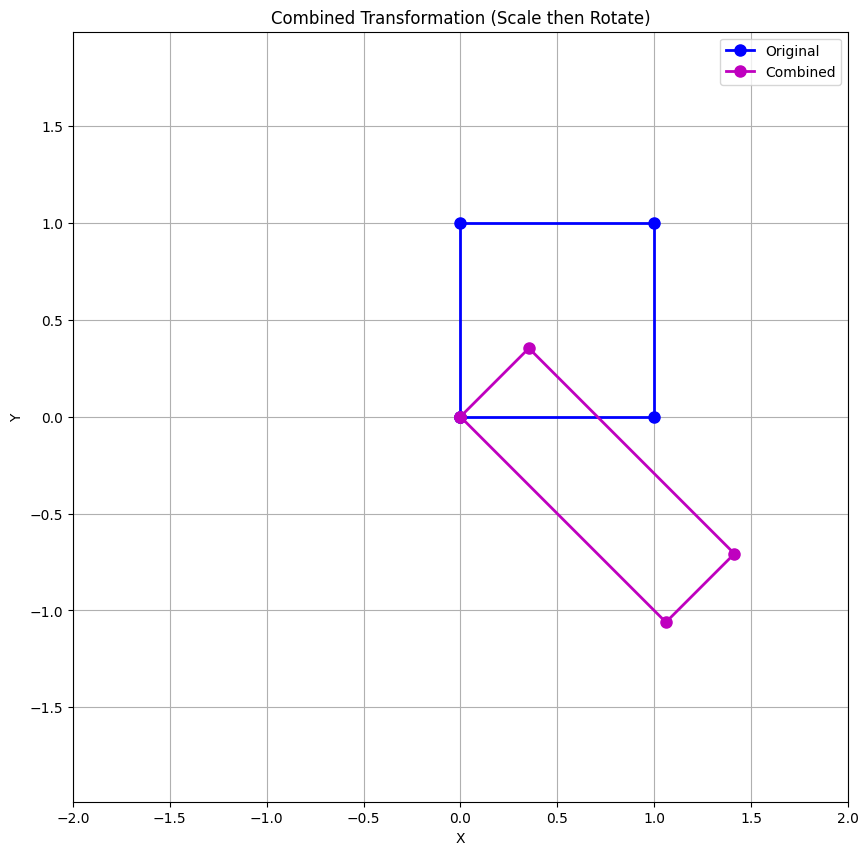

In [5]:
# First scaling, then rotation
combined_matrix = scaling_matrix @ rotation_matrix
print("Combined Matrix (Scale then Rotate):")
print(combined_matrix)

# Apply the transformation
transformed_points = points @ combined_matrix

# Plot the result
plt.figure(figsize=(10, 10))
plt.plot(points[:, 0], points[:, 1], 'b-o', linewidth=2, markersize=8, label='Original')
plt.plot(transformed_points[:, 0], transformed_points[:, 1], 'm-o', linewidth=2, markersize=8, label='Combined')
plt.grid(True)
plt.axis('equal')
plt.title('Combined Transformation (Scale then Rotate)')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.show()


Combined Matrix (Rotate then Scale):
tensor([[ 1.0607, -0.3536],
        [ 1.0607,  0.3536]])


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


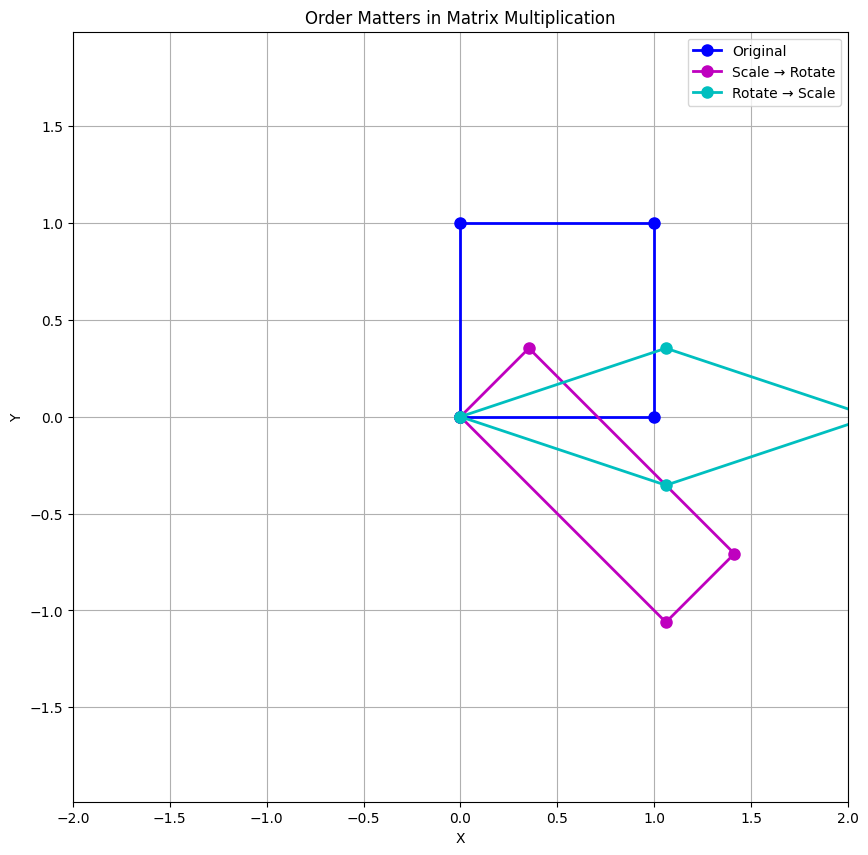

In [6]:
# Now let's do rotation first, then scaling
combined_matrix_2 = rotation_matrix @ scaling_matrix
print("Combined Matrix (Rotate then Scale):")
print(combined_matrix_2)

# Apply the transformation
transformed_points_2 = points @ combined_matrix_2

# Plot to compare both combinations
plt.figure(figsize=(10, 10))
plt.plot(points[:, 0], points[:, 1], 'b-o', linewidth=2, markersize=8, label='Original')
plt.plot(transformed_points[:, 0], transformed_points[:, 1], 'm-o', linewidth=2, markersize=8, label='Scale → Rotate')
plt.plot(transformed_points_2[:, 0], transformed_points_2[:, 1], 'c-o', linewidth=2, markersize=8, label='Rotate → Scale')
plt.grid(True)
plt.axis('equal')
plt.title('Order Matters in Matrix Multiplication')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.show()


## 3.3 Simple Neural Network Layer

In neural networks, each layer can be represented as a matrix multiplication followed by a non-linear activation function:

```
output = activation_function(input @ weights + bias)
```

Let's implement a simple layer:


In [7]:
# Create a simple input with 3 features (batch size of 2)
input_data = torch.tensor([
    [1.0, 2.0, 3.0],  # Sample 1
    [0.5, 1.5, 2.5]   # Sample 2
])
print("Input data shape:", input_data.shape)
print(input_data)

# Create a weight matrix for a layer with 2 neurons
# Each column corresponds to weights for one neuron
weights = torch.tensor([
    [0.1, 0.2],  # Weights from input feature 1
    [0.3, 0.4],  # Weights from input feature 2
    [0.5, 0.6]   # Weights from input feature 3
])
print("\nWeights shape:", weights.shape)
print(weights)

# Create a bias vector
bias = torch.tensor([0.1, 0.2])


Input data shape: torch.Size([2, 3])
tensor([[1.0000, 2.0000, 3.0000],
        [0.5000, 1.5000, 2.5000]])

Weights shape: torch.Size([3, 2])
tensor([[0.1000, 0.2000],
        [0.3000, 0.4000],
        [0.5000, 0.6000]])


In [8]:
# Compute the layer output (before activation)
layer_output = input_data @ weights + bias

print("Layer output (before activation):")
print(layer_output)
print("Output shape:", layer_output.shape)

# Apply an activation function (e.g., ReLU) 
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)

activated_output = relu(layer_output)
print("\nActivated output (after ReLU):")
print(activated_output)


Layer output (before activation):
tensor([[2.3000, 3.0000],
        [1.8500, 2.4000]])
Output shape: torch.Size([2, 2])

Activated output (after ReLU):
tensor([[2.3000, 3.0000],
        [1.8500, 2.4000]])


Let's visualize this neural network layer operation as a matrix multiplication:


/tmp/ipykernel_59908/1584864838.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


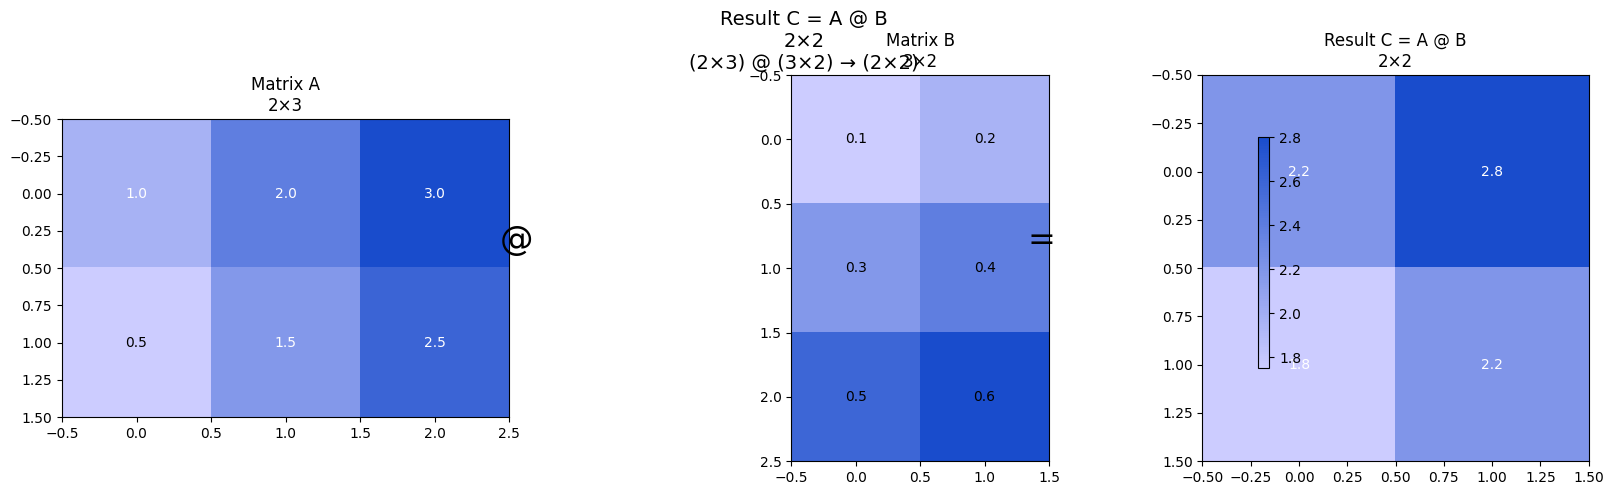

tensor([[2.2000, 2.8000],
        [1.7500, 2.2000]])

In [9]:
# Visualize the matrix multiplication (without the bias and activation)
visualize_matrix_multiplication(input_data, weights, "Neural Network Layer")


## 3.4 Dimension Rules for Matrix Multiplication

Let's review and demonstrate compatible and incompatible dimensions for matrix multiplication.


In [10]:
def explore_dimension_rules():
    """Explore compatible and incompatible dimensions for matrix multiplication."""
    print("Matrix Multiplication Dimension Rules\n")
    print("For multiplication A @ B to be valid:")
    print("- A must be of shape (m × n)")
    print("- B must be of shape (n × p)")
    print("- The inner dimensions (n) must match")
    print("- The result C will be of shape (m × p)")
    print("\nExamples of compatible dimensions:")
    
    examples = [
        ((2, 3), (3, 4)),
        ((5, 2), (2, 3)),
        ((1, 4), (4, 10)),
        ((10, 7), (7, 1))
    ]
    
    for (m, n), (n_check, p) in examples:
        print(f"- ({m} × {n}) @ ({n_check} × {p}) → ({m} × {p})")
    
    print("\nExamples of incompatible dimensions:")
    
    incompatible = [
        ((2, 3), (4, 5)),  # Inner dimensions don't match: 3 ≠ 4
        ((5, 2), (3, 4)),  # Inner dimensions don't match: 2 ≠ 3
    ]
    
    for (m, n), (n_check, p) in incompatible:
        print(f"- ({m} × {n}) @ ({n_check} × {p}) → Error! Inner dimensions don't match: {n} ≠ {n_check}")
    
    # Demonstrate a compatible example
    print("\nDemonstrating a compatible example:")
    A = torch.rand(2, 3)
    B = torch.rand(3, 4)
    print(f"A shape: {A.shape}")
    print(f"B shape: {B.shape}")
    C = A @ B
    print(f"C = A @ B shape: {C.shape}")
    
    # Try an incompatible example
    print("\nDemonstrating an incompatible example:")
    A = torch.rand(2, 3)
    D = torch.rand(4, 5)
    print(f"A shape: {A.shape}")
    print(f"D shape: {D.shape}")
    try:
        E = A @ D
        print(f"E = A @ D shape: {E.shape}")
    except RuntimeError as e:
        print(f"Error: {e}")

# Run the function
explore_dimension_rules()


Matrix Multiplication Dimension Rules

For multiplication A @ B to be valid:
- A must be of shape (m × n)
- B must be of shape (n × p)
- The inner dimensions (n) must match
- The result C will be of shape (m × p)

Examples of compatible dimensions:
- (2 × 3) @ (3 × 4) → (2 × 4)
- (5 × 2) @ (2 × 3) → (5 × 3)
- (1 × 4) @ (4 × 10) → (1 × 10)
- (10 × 7) @ (7 × 1) → (10 × 1)

Examples of incompatible dimensions:
- (2 × 3) @ (4 × 5) → Error! Inner dimensions don't match: 3 ≠ 4
- (5 × 2) @ (3 × 4) → Error! Inner dimensions don't match: 2 ≠ 3

Demonstrating a compatible example:
A shape: torch.Size([2, 3])
B shape: torch.Size([3, 4])
C = A @ B shape: torch.Size([2, 4])

Demonstrating an incompatible example:
A shape: torch.Size([2, 3])
D shape: torch.Size([4, 5])
Error: mat1 and mat2 shapes cannot be multiplied (2x3 and 4x5)


## 3.5 Matrix-Vector Multiplication

A special case of matrix multiplication is when we multiply a matrix by a vector. This is commonly used in:

- Transforming points in computer graphics
- Applying linear transformations
- Computing neural network outputs


Matrix A shape: torch.Size([2, 3])
Vector v shape: torch.Size([3, 1])

Result of A @ v:
tensor([[ 50.],
        [122.]])
Result shape: torch.Size([2, 1])


/tmp/ipykernel_59908/1584864838.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


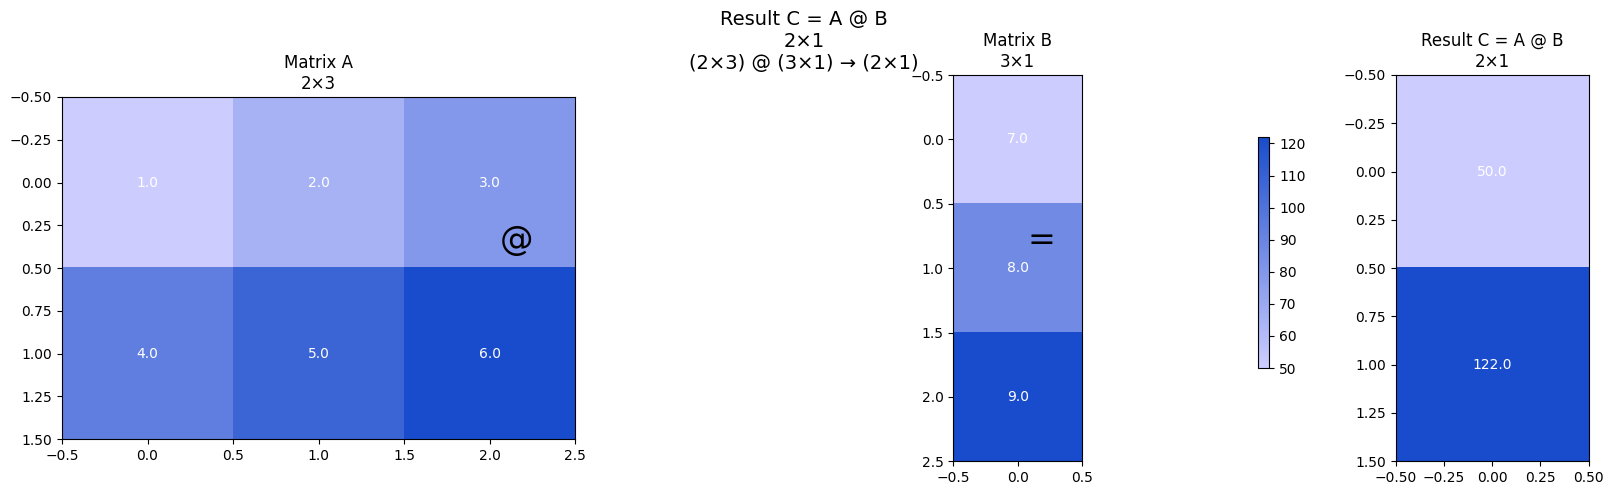

tensor([[ 50.],
        [122.]])

In [11]:
# Create a matrix and a vector
A = torch.tensor([[1., 2., 3.], 
                 [4., 5., 6.]])  # 2×3 matrix

v = torch.tensor([[7.], 
                 [8.], 
                 [9.]])  # 3×1 vector (column vector)

print(f"Matrix A shape: {A.shape}")
print(f"Vector v shape: {v.shape}")

# Perform matrix-vector multiplication
result = A @ v
print("\nResult of A @ v:")
print(result)
print(f"Result shape: {result.shape}")

# Visualize the matrix-vector multiplication
visualize_matrix_multiplication(A, v, "Matrix-Vector Multiplication")


## 3.6 Summary

We've explored several practical applications of matrix multiplication:

1. **2D Transformations**: Scaling, rotation, and combined transformations
2. **Neural Networks**: Matrix multiplication as the core operation in neural network layers
3. **Dimension Rules**: Understanding when matrices can be multiplied
4. **Matrix-Vector Multiplication**: A special case with numerous applications

Matrix multiplication is a cornerstone operation in many algorithms and technologies, from machine learning to computer graphics, robotics, physics simulations, and more.